### **Telecom Churn Prediction**

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer 
from sklearn.preprocessing import RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV,  KFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,  GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('Telco Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
TelcoChurnDesc = []
for i in df.columns:
    TelcoChurnDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round(((df[i].isna().sum() / len(df)) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(TelcoChurnDesc, columns=[
    "Data Features",
    "Data Types",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,customerID,object,0,0.0,7043,"[5999-LCXAO, 6857-TKDJV]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[No, Yes]"
5,tenure,int64,0,0.0,73,"[49, 67]"
6,PhoneService,object,0,0.0,2,"[No, Yes]"
7,MultipleLines,object,0,0.0,3,"[Yes, No]"
8,InternetService,object,0,0.0,3,"[No, Fiber optic]"
9,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
pd.crosstab(df['Churn'],columns='Persentase Churn',normalize=True)*100 # Balance because the ratio is below 80%

col_0,Persentase Churn
Churn,
No,73.463013
Yes,26.536987


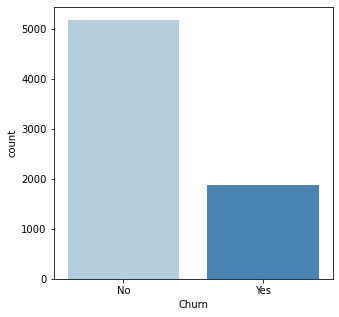

In [7]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x=df['Churn'], palette ='Blues', linewidth = 1)
plt.show()

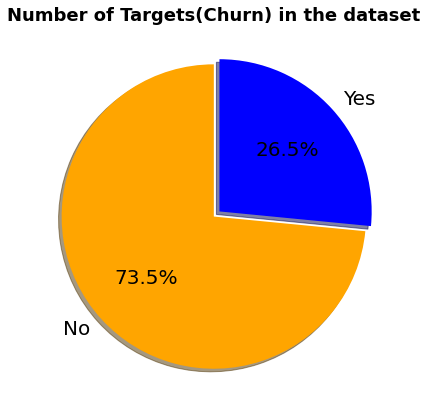

In [8]:
plt.figure(figsize=(7,7))
plt.title("Number of Targets(Churn) in the dataset", size=18, weight='bold')
plt.pie(df['Churn'].value_counts(), explode=(0,0.05), labels=['No', 'Yes'], colors=["orange","blue"], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":20})

plt.show()

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Checking Missing Value

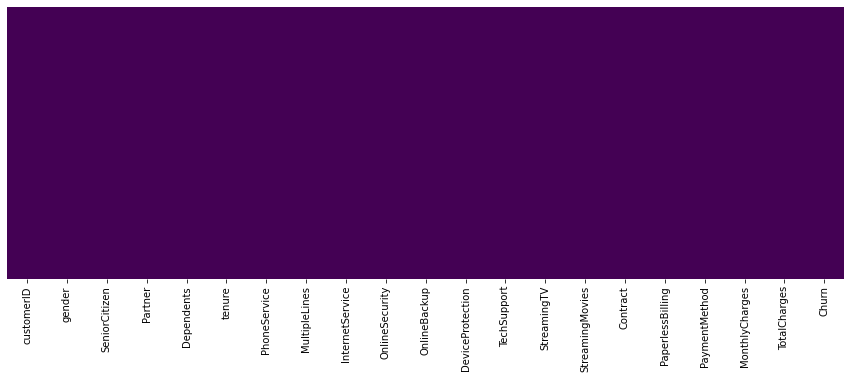

In [10]:
plt.figure(figsize = (15, 5))
sns.heatmap(df.isna(), cmap = 'viridis',yticklabels = False, cbar= False)
plt.show()

In [11]:
df=df[df['TotalCharges']!=' ']

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'ignore')

In [13]:
11/7043*100 # Di drop baris 

0.1561834445548772

# CEK OUTLIERS

In [14]:
def cek_outliers(tabel,col):
    Q1 = tabel[col].describe()['25%']
    Q3 = tabel[col].describe()['75%']
    IQR = Q3-Q1
    UF = Q3 + (1.5*IQR)
    LF = Q1 - (1.5*IQR)
    tabel_outliers = df[(df[col] < LF) | (df[col] > UF)]
    if len(tabel_outliers) == 0:
           return "No Outliers"
    else:
           return tabel_outliers

In [15]:
cek_outliers(df,'MonthlyCharges')

'No Outliers'

In [16]:
cek_outliers(df,'tenure')

'No Outliers'

In [17]:
cek_outliers(df,'TotalCharges')

'No Outliers'

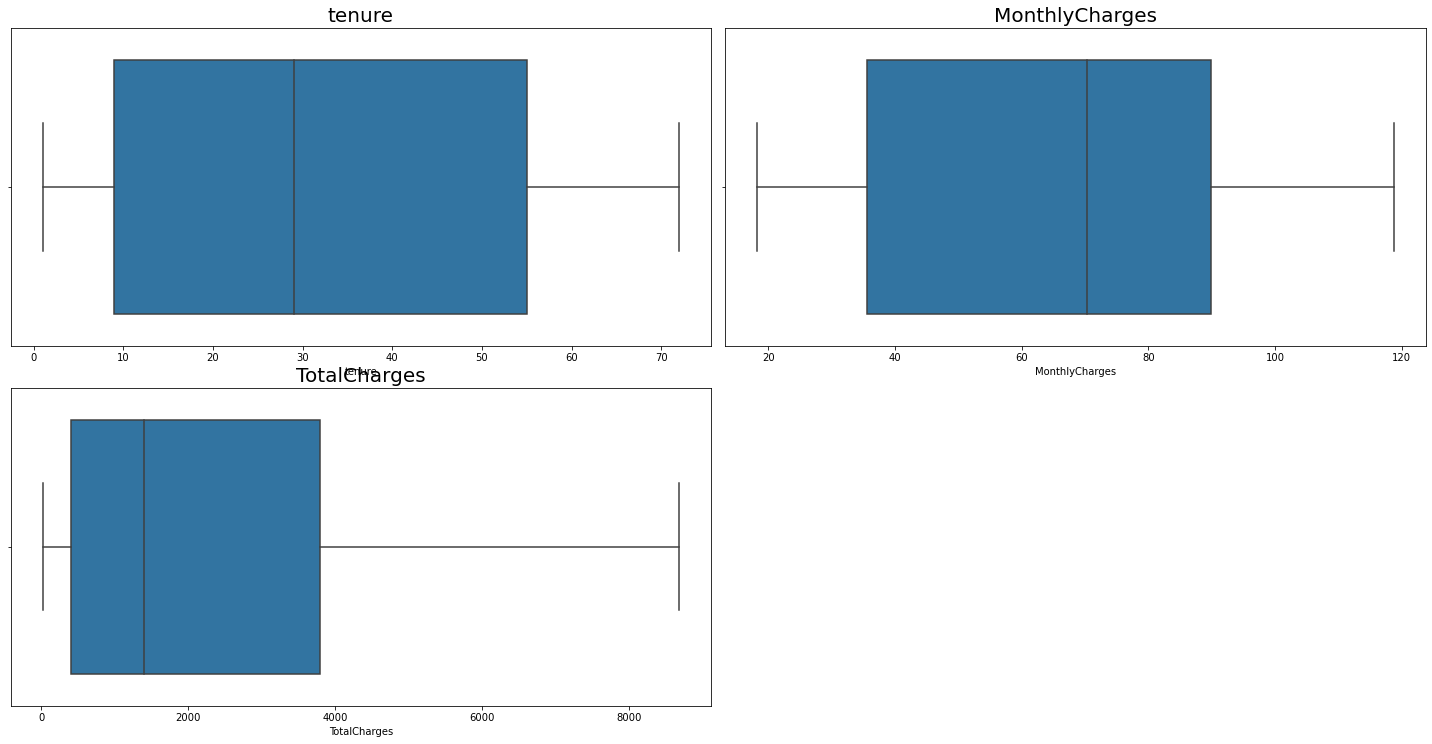

In [18]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    sns.boxplot(df[i])
    fig.tight_layout()
    plt.title(i,fontsize=20)

plt.show()

# TARGET VALUES

In [19]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No':0})

In [20]:
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'] 

# Data Splitting and Train-Test Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = .20, random_state = 42) 

Splitting data is done to divide the amount of data that you want to train and test. In testing the data this time I divided 20% of the data for testing and 80% for training.

In [22]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 1413 to 1505
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   object 
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   object 
 3   Dependents        5625 non-null   object 
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   object 
 6   MultipleLines     5625 non-null   object 
 7   InternetService   5625 non-null   object 
 8   OnlineSecurity    5625 non-null   object 
 9   OnlineBackup      5625 non-null   object 
 10  DeviceProtection  5625 non-null   object 
 11  TechSupport       5625 non-null   object 
 12  StreamingTV       5625 non-null   object 
 13  StreamingMovies   5625 non-null   object 
 14  Contract          5625 non-null   object 
 15  PaperlessBilling  5625 non-null   object 
 16  PaymentMethod     5625 non-null   objec

# PIPELINE

Data is being processed through Pipeline, in order to simplify the process and avoid data leakage. 

First of all the data is grouped into numerical and categorical pipeline based on it's type of data as these two types of data will be treated differently. 
Numbers that goes through numerical pipeline where missing value will be filled with it's mean and all the numbers are scaled using robust scaler where it is scaled based on its quantile range. Categorical type of data's missing value will be filled with its mode / most frequent and they will be encoded using one hot encoder.

Last, it will go to the algorithm pipeline. There are three algorithm that will be used: KNN, Random Forest, XGBoost, and Logistic Regression.

# Pipeline

In [23]:
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges','TotalCharges']
cat_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod']  

numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()) 
])


categoric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first', handle_unknown = 'ignore')) 
])


preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, num_columns), 
    ('categoric', categoric_pipeline, cat_columns),
])



base_LogReg = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression())
])

base_KNN = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])


base_RF = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier())
])

base_XGB = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier())
])

# BASE MODEL

In [24]:
base_model= [base_KNN, base_RF, base_XGB, base_LogReg]
model = ['KNN', 'RF', 'XGB', 'LogReg']
data = {}

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    F1 = f1_score(y_true, y_pred)
    y_predict_proba = Model.predict_proba(X)[:,1]
    return Acc, Rec, Prec, F1

for i in range(len(base_model)):
    base_model[i].fit(X_train, y_train)
    Acc_train, Rec_train, Prec_train, F1_train = Eva_Matrix(base_model[i], X_train, y_train)
    Acc_test, Rec_test, Prec_test, F1_test = Eva_Matrix(base_model[i], X_test, y_test)
    data[f'Train {model[i]}'] = Acc_train, Rec_train, Prec_train, F1_train
    data[f'Test {model[i]}'] = Acc_test, Rec_test, Prec_test, F1_test
pd.DataFrame(data = data, index = ["Accuracy", "Recall", "Precision", "F1"]).T.sort_values('Recall', ascending=False)

,Accuracy,Recall,Precision,F1
Train RF,0.998756,0.995987,0.999329,0.997655
Train XGB,0.937600,0.853512,0.906250,0.879091
Train KNN,0.841067,0.652843,0.722428,0.685875
Test LogReg,0.802416,0.572193,0.644578,0.606232
Test KNN,0.761194,0.550802,0.550802,0.550802
Train LogReg,0.803200,0.547826,0.655200,0.596721
Test XGB,0.775409,0.532086,0.585294,0.557423
Test RF,0.794598,0.505348,0.645051,0.566717


# KNN

KNN algorithm is one of the algorithm used in classification that are based on the attributes and samples from training data. KNN uses neighborhood classification as a prediction value from new instance. Classification instance that is done based on the majority from nearest neighbors category.

Source : Fundamental Python For Machine Learning (Dasar-Dasar Pemrograman Python untuk Machine Learning dan Kecerdasan Buatan)

# Predict Training (KNN)

In [25]:
knn_train = base_KNN.fit(X_train, y_train) 

In [26]:
z = knn_train.predict(X_train)

In [27]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4130
           1       0.72      0.65      0.69      1495

    accuracy                           0.84      5625
   macro avg       0.80      0.78      0.79      5625
weighted avg       0.84      0.84      0.84      5625



# Predict Test (KNN)

In [28]:
y_knn = base_KNN.predict(X_test)

In [29]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



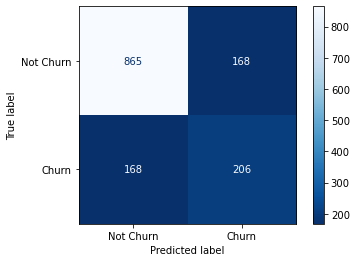

In [30]:
plot_confusion_matrix(base_KNN, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Blues_r')

Confusion Matrix : Confusion matrix are used to measure binary classification and multiclass classification. Binary classification only results in two output class (label), "Yes" and "No", or "0" and "1" for every data input given.

# HYPER PARAMETER TUNING (KNN)

Hyperparameter tuning is parameter value used to improve learning algorithm. Hyperparameter identify which tuple parameters will produce optimal model. To further improve our KNN model, Hyperparameter tuning will be performed. In this K-nearest neighbors we will use K = parameter which are the amount of neighbors that can be adjusted. 

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [31]:
param_KNN = {
    'algo__n_neighbors' : np.arange(1, 1000, 10), 
    'algo__weights': ['uniform','distance'], 
    'algo__p' : [1,2]  
}

In [32]:
np.arange(1, 1000, 10)

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991])

In [33]:
skf = StratifiedKFold(n_splits=4) 

In [34]:
GSS_KNN = GridSearchCV(base_KNN, param_KNN, cv = skf, n_jobs=-1, verbose=1)

In [35]:
GSS_KNN.fit(X_train, y_train)

Fitting 4 folds for each of 400 candidates, totalling 1600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='m...
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591, 601, 611, 621, 631, 641,
       651, 661, 671, 681, 691, 701, 711, 721, 731, 741, 751, 761, 771,
       781, 791, 801, 811, 821, 831, 841, 851, 861, 871, 881, 891, 901,
       911, 921, 931, 941, 951, 961, 971, 981, 991]),
                         'algo__p': [1, 2],
                         'algo__weights': ['uniform', 'distance']},
             verbose=1)

In [36]:
KNN_Tuned = GSS_KNN.best_estimator_

In [37]:
y_ts_KNN = KNN_Tuned.predict(X_test)

### Classification Report KNN

In [38]:
print(classification_report(y_test, y_ts_KNN))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1033
           1       0.61      0.61      0.61       374

    accuracy                           0.79      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.79      0.79      0.79      1407



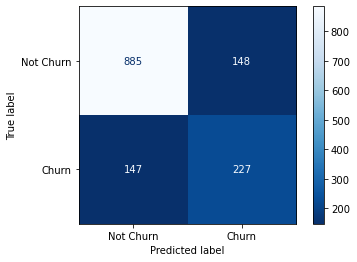

In [39]:
plot_confusion_matrix(KNN_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Blues_r')

# LOGISTIC REGRESION

Logistic Regression is a classification algorithm to find the relationship between discrete/continuous features (input) and the probability of certain discrete output results.

In [40]:
base_LogReg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('algo', LogisticRegression())])

### Predict Train (Logistic Regression)

In [41]:
LogReg_train = base_LogReg.fit(X_train, y_train) 

In [42]:
z = LogReg_train.predict(X_train)

In [43]:
print(classification_report(y_train, z))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.72      0.73      5625
weighted avg       0.79      0.80      0.80      5625



### Predict Test (Logistic Regression)

In [44]:
y_LogReg = base_LogReg.predict(X_test)

In [45]:
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1033
           1       0.55      0.55      0.55       374

    accuracy                           0.76      1407
   macro avg       0.69      0.69      0.69      1407
weighted avg       0.76      0.76      0.76      1407



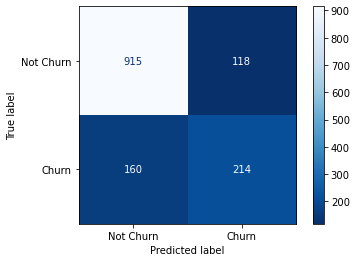

In [46]:
plot_confusion_matrix(base_LogReg, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Blues_r')

# Hyper Parameter Tuning Logistic Regression

Hyperparameter tuning is parameter value used to improve learning algorithm. Hyperparameter identify which tuple parameters will produce optimal model. To further improve our Logistic Regression model, Hyperparameter tuning will be performed. Hyper parameter tuning in Logistic Regression is used to determine the optimal data using the Logistic Regression model with the aim of minimizing the loss function.

Source : https://tentangdata.wordpress.com/2017/09/21/definisi-optimisasi-machine-learning/, https://codingstudio.id/hyperparameter-tuning/

In [47]:
param_LR = {
    'algo__C' : np.logspace(-3, 3, 7),
    'algo__penalty' : ['l1', 'l2', 'lasso']
}
skf = StratifiedKFold(n_splits=4)

In [48]:
GS_logreg = GridSearchCV(base_LogReg, param_LR, scoring='recall', cv = skf, n_jobs=-1, verbose = True)

In [49]:
GS_logreg.fit(X_train, y_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges']),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='m...
                                                                          'MultipleLines',
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'Contract',
                                                                          'PaperlessBilling',
                                                                          'PaymentMethod'])])),
                                       ('algo', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'algo__penalty': ['l1', 'l2', 'lasso']},
             scoring='recall', verbose=True)

In [50]:
GS_logreg.best_params_

{'algo__C': 100.0, 'algo__penalty': 'l2'}

In [51]:
LR_Tuned = GS_logreg.best_estimator_

### Classification Report Logistic Regression

In [52]:
print(classification_report(y_test, LR_Tuned.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1033
           1       0.64      0.58      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



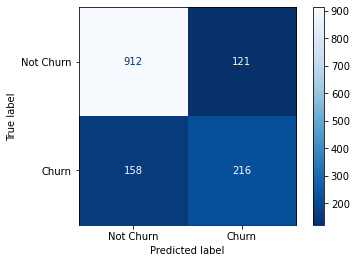

In [53]:
plot_confusion_matrix(LR_Tuned, X_test, y_test, display_labels=['Not Churn', 'Churn'], cmap='Blues_r')

# Comparation Between Model

In [55]:
base_model= [KNN_Tuned, LR_Tuned]
model = ['KNN', 'LogisticRegression']
data = {}

def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Rec = recall_score(y_true, y_pred)
    y_predict_proba = Model.predict_proba(X)[:,1]
    return Rec

for i in range(len(base_model)):
    Rec_test = Eva_Matrix(base_model[i], X_test, y_test)
    data[f'Test {model[i]}'] = Rec_test
pd.DataFrame(data = data, index = ["Recall"]).T.sort_values('Recall', ascending=False)

,Recall
Test KNN,0.606952
Test LogisticRegression,0.577540


### Selection Of The Best Model To Determine Recommendations

From the 4 existing base models (Logistic Regression, KNN, XGBOOST, and Random Forest) 2 base models are taken with the highest value, namely the Logistic Regression base model and the KNN Base Model. then after that, hyperparameter tuning of the 2 best models is carried out according to the base model. The use of 4 base models in telco churn data processing is based on how we want to find out which model has the best value to determine recommendations. The next reason is because the four models are popular and powerful models. In this discussion, the classification report that is the main focus is recall, because it focuses on false negatives (predictions of churn are not actual churn).

From the 2 models that have done hyperparameter tuning above, the best positive recall value is found in the **KNN** model with a value of 0.606952 or rounded up to 0.61, this value is seen from the comparison of the two models (KNN and Logistic Regression) that have been tuned. From this model we can look for probability predictions with the aim of making recommendations in the aspect of using machine learning.

# Predict Probability

In [56]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1413,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),94.55,6078.75
7003,Male,0,No,No,26,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.50
3355,Female,0,Yes,No,68,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic),90.20,6297.65
4494,Male,0,No,No,3,Yes,No,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,No,Electronic check,84.30,235.05
3541,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75


In [57]:
data_telco = {
    "gender" : "Female",
    "SeniorCitizen" : 0,
    "Partner" : "Yes",
    "Dependents" : "Yes",
    "tenure" : 3,
    "PhoneService" : "Yes",
    "MultipleLines" : "Yes",
    "InternetService" : "Fiber optic",
    "OnlineSecurity" : "Yes",
    "OnlineBackup" : "Yes",
    "DeviceProtection" : "Yes",
    "TechSupport" : "Yes",
    "StreamingTV" : "No",
    "StreamingMovies" : "No",
    "Contract" : "Two year",
    "PaperlessBilling" : "No",
    "PaymentMethod" : "Credit card (automatic)",
    "MonthlyCharges" : 94.55,
    "TotalCharges" : 6078.75
}

In [58]:
telco = pd.DataFrame(data_telco, index=[1])

In [59]:
GSS_KNN.predict(telco)

array([0], dtype=int64)

In [60]:
hasil = GSS_KNN.predict_proba(telco)[0][1]
hasil

0.04225352112676056

In [61]:
if hasil >= 0.7:
    print('Full retention cost: $80')
if hasil < 0.7 and hasil >= 0.3:
    print('half retention cost: $40')
else:
    print('no action needed')

no action needed


# CONCLUSION

1. The target in this analysis is recall yes because it focuses on False Negative (Actual Churn With No Predictions)
2. In telco churn data analysis, the *KNN* model is the best model with a hyperparameter tuning process with a recall positif target of 0.61
3. When using machine learning, we can find out the probability that customers will churn. which before using machine learning we give promos to all customers with the aim of maintaining potential revenue, and after using machine learning we only give promos to customers who will be predicted to churn

# RECOMENDATION

We can give offers to some people who fall into the positive recall group or predict that the actual churn will not churn, which before using machine learning we give promos to everyone, while after using the promo, we can find out which customers can be offered an offer by The goal is to reduce the churn rate for customers. The offer is given when we know the probability of customer churn is:

- if the prediction is below 0.3 then no promotion will be given
- if the prediction is above 0.3 to 0.7, the promotion will be given "Half Retention Cost = 40$"

- If the prediction is above 0.7, the promotion will be given "Full Retention Cost = 80$"